Quais são os lucros das vendas por ano? Em qual ano obtivemos o maior lucro?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
vendas_loja = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/dataviz-graficos/refs/heads/master/dados/relatorio_vendas.csv')
vendas_loja

,data_pedido,data_envio,modo_envio,nome_cliente,segmento_cliente,cidade,estado,regiao,departamento,tipo_produto,preco_base,preco_unit_sem_desc,desconto,preco_unit_venda,quantidade,vendas,lucro
0,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,encanamentos,409.70,445.33,0.000,445.33,2,890.66,71.26
1,2018-11-09,2018-11-12,Econômica,Thiago Silveira,B2C,Ribeirão Preto,São Paulo,Sudeste,Materiais de construção,ferramentas,705.10,829.53,0.000,829.53,3,2488.59,373.29
2,2018-06-13,2018-06-17,Econômica,Giovanna Lima,B2B,Rio de Janeiro,Rio de Janeiro,Sudeste,Jardinagem e paisagismo,sementes,19.02,24.86,0.000,24.86,2,49.72,11.68
3,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Materiais de construção,materiais de revestimento,781.38,840.19,0.225,651.15,5,3255.75,-651.15
4,2017-10-12,2017-10-19,Entrega padrão,Ana Júlia da Cruz,B2C,Foz do Iguaçu,Paraná,Sul,Jardinagem e paisagismo,vasos,35.88,42.24,0.100,38.02,2,76.04,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8935,2018-09-30,2018-10-04,Entrega padrão,Enrique Santos,B2C,Rio de Janeiro,Rio de Janeiro,Sudeste,Automotivo,ferramentas automotivas,97.34,123.22,0.000,123.22,1,123.22,25.88
8936,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,ferramentas automotivas,223.01,271.97,0.000,271.97,1,271.97,48.96
8937,2019-11-18,2019-11-22,Entrega padrão,Heitor Silveira,B2B,Jequié,Bahia,Nordeste,Automotivo,pneus,121.23,140.15,0.000,140.15,5,700.75,94.60
8938,2016-01-22,2016-01-24,Econômica,Isabel Araújo,B2C,João Pessoa,Paraíba,Nordeste,Materiais de construção,iluminação,26.29,31.79,0.100,28.61,3,85.83,6.96


In [3]:
vendas_loja['data_pedido'] = pd.to_datetime(vendas_loja['data_pedido'], format = '%Y-%m-%d') #transformaando a data do pedido em datetime
vendas_loja.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8940 entries, 0 to 8939
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data_pedido          8940 non-null   datetime64[ns]
 1   data_envio           8940 non-null   object        
 2   modo_envio           8940 non-null   object        
 3   nome_cliente         8940 non-null   object        
 4   segmento_cliente     8940 non-null   object        
 5   cidade               8940 non-null   object        
 6   estado               8940 non-null   object        
 7   regiao               8940 non-null   object        
 8   departamento         8940 non-null   object        
 9   tipo_produto         8940 non-null   object        
 10  preco_base           8940 non-null   float64       
 11  preco_unit_sem_desc  8940 non-null   float64       
 12  desconto             8940 non-null   float64       
 13  preco_unit_venda     8940 non-nul

In [4]:
lucro_ano = vendas_loja.copy()
lucro_ano = lucro_ano[['data_pedido', 'lucro']] #criando df só com as informações necessárias
lucro_ano

,data_pedido,lucro
0,2018-11-09,71.26
1,2018-11-09,373.29
2,2018-06-13,11.68
3,2017-10-12,-651.15
4,2017-10-12,4.28
...,...,...
8935,2018-09-30,25.88
8936,2019-11-18,48.96
8937,2019-11-18,94.60
8938,2016-01-22,6.96


In [5]:
lucro_ano['ano']= lucro_ano['data_pedido'].dt.year #estraindo o ano
lucro_ano.drop('data_pedido', axis = 1, inplace = True) #excluindo a coluna data_pedido
lucro_ano

,lucro,ano
0,71.26,2018
1,373.29,2018
2,11.68,2018
3,-651.15,2017
4,4.28,2017
...,...,...
8935,25.88,2018
8936,48.96,2019
8937,94.60,2019
8938,6.96,2016


In [6]:
lucro_ano = lucro_ano.groupby('ano').sum() #agrupando por ano
lucro_ano

,lucro
ano,
2016,75033.63
2017,101265.15
2018,129862.44
2019,148097.30


<ipython-input-35-3086a4b33877>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = lucro_ano, x = lucro_ano.index, y= 'lucro', palette= cores)


Text(3.5, 100000.0, 'O maior lucro registrado foi no ano $\\bf{2019}$.\nEm comparação com 2018, o lucro\nsubiu aproximadamente $\\bf{14,04}$%.')

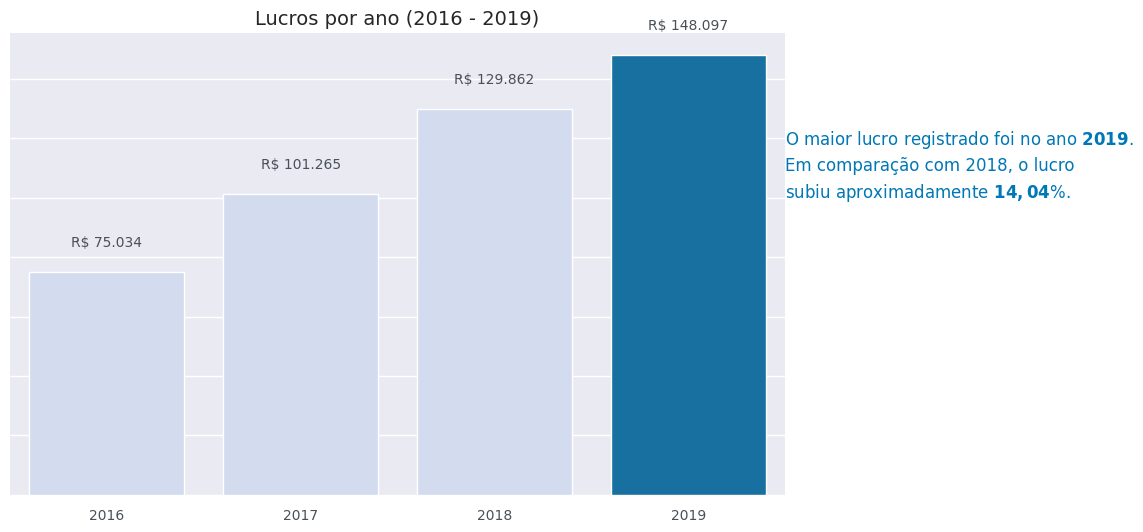

In [35]:
# gerando gráfico

AZUL1, AZUL2, AZUL3, AZUL4, AZUL5 = '#03045e', '#0077b6', "#00b4d8", '#90e0ef', '#CDDBF3'
CINZA1, CINZA2, CINZA3, CINZA4, CINZA5 = '#212529', '#495057', '#adb5bd', '#dee2e6', '#f8f9fa'
VERMELHO1, LARANJA1, AMARELO1, VERDE1, VERDE2 = '#e76f51', '#f4a261',	'#e9c46a', '#4c956c', '#2a9d8f'

fig, ax = plt.subplots(figsize = (10,6))
sns.set_theme(style='darkgrid')

cores = [] #cria uma lista vazia de cores

for ano in lucro_ano.index: #para gerar as cores
  if lucro_ano.loc[ano, 'lucro'] == lucro_ano['lucro'].max():
    cores.append(AZUL2)
  else:
    cores.append(AZUL5)

ax = sns.barplot(data = lucro_ano, x = lucro_ano.index, y= 'lucro', palette= cores)
ax.set_title('Lucros por ano (2016 - 2019)', fontsize = 14)
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2) #cores e tamanhos do eixo x
sns.despine(bottom = True, left = True)

#Colocando valores dentro do gráfico
ax.set_yticklabels([]) #remove o eixo y
for i, valor in enumerate(lucro_ano['lucro']):
  qtd = f'R$ {valor:,.0f}'.replace(',', '.')
  offset = 1e4
  ax.text(i, valor + offset, qtd, color = CINZA2, fontsize = 10, ha = 'center', va = 'center')

#craidno uma anotação
ax.text(3.5, 1e5,
        'O maior lucro registrado foi no ano $\\bf{2019}$.\n'
        'Em comparação com 2018, o lucro\n'
        'subiu aproximadamente $\\bf{14,04}$%.',
        fontsize = 12, linespacing = 1.45, color = AZUL2)

Desafio 2: Qual foi o faturamento (vendas) dos top 10 produtos durante o período de 2016 a 2019 do nosso conjunto de dados? Adicione um pequeno texto falando dos 3 produtos que mais venderam.

In [31]:
#CRIANDO O DATFRAME
faturamento = vendas_loja.copy()
faturamento = faturamento[['tipo_produto', 'vendas']]
faturamento

,tipo_produto,vendas
0,encanamentos,890.66
1,ferramentas,2488.59
2,sementes,49.72
3,materiais de revestimento,3255.75
4,vasos,76.04
...,...,...
8935,ferramentas automotivas,123.22
8936,ferramentas automotivas,271.97
8937,pneus,700.75
8938,iluminação,85.83


In [32]:
faturamento = faturamento.groupby(['tipo_produto']).agg('sum').sort_values('vendas', ascending= False) #somando e organizando por ordem decrescente
top10 = faturamento[:10] #vendo o 10 primeiros
top10

,vendas
tipo_produto,
pneus,1022428.97
ferramentas,995158.41
vasos,696044.18
ferramentas de jardinagem,648879.72
materiais de revestimento,629656.36
equipamentos de limpeza,542304.58
ferramentas automotivas,502109.29
peças de reposição,486907.94
encanamentos,373223.88


In [33]:
# texto colorido para anotações
from matplotlib import transforms

In [34]:
def texto_colorido(x, y, texto, cores, esp = 20, ax = None, **kw):
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color = cor, transform = t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x = ex.width, units = 'dots')

      t = transforms.offset_copy(ax.transData, x = 0, y=(i + 1,) * esp, units = 'dots')

In [57]:
# Código para gerar o texto colorido

from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp=20, ax=None, **kw):
    cores = list(reversed(cores))
    t = ax.transData
    canvas = ax.figure.canvas

    for i, linha in enumerate(reversed(texto.split('\n'))):
        frases = linha.split('||')
        for s, cor in zip(frases, cores[i]):
            texto = ax.text(x, y, s, color=cor, transform=t, **kw)
            texto.draw(canvas.get_renderer())
            ex = texto.get_window_extent()
            t = transforms.offset_copy(texto._transform, x=ex.width,
                                       units='dots')

        t = transforms.offset_copy(ax.transData, x=0, y=(i + 1) * esp, units='dots')

<ipython-input-55-b44137383142>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top10, x = 'vendas', y = top10.index, palette = cores)


ValueError: setting an array element with a sequence.

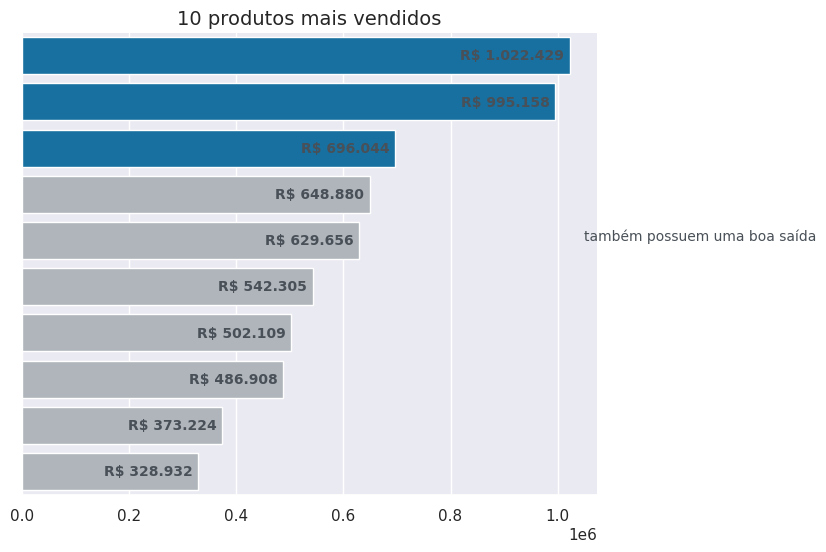

In [55]:
#gerando o gráfico
fig, ax = plt.subplots(figsize = (10,6))
fig.subplots_adjust(right=0.7)

cores = [AZUL2 if i < 3 else CINZA3 for i in range(10)] #código para as cores

ax = sns.barplot(data = top10, x = 'vendas', y = top10.index, palette = cores)
ax.set_title('10 produtos mais vendidos', fontsize = 14)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_yticklabels([])
ax.yaxis.set_tick_params(labelsize = 10, labelcolor = CINZA2)
sns.despine(bottom = False, left = False)

#valores nas barras
for i, valor in enumerate(top10['vendas']):
  qtd = f'R$ {valor:,.0f}'.replace(',', '.')
  offset = 1e4
  ax.text(valor - offset, i, qtd, color = CINZA2, fontsize = 10, fontweight  = 'bold', ha = 'right', va = 'center' )

#texto colorido
texto_colorido(
    1.05e6, 4,
    'Os dados que indicam que os 3 produtos que || $\\bf{mais}$\n'
    'venderam foram: || $\\bf{pneus, \ferramentas\ e\ vasos}$.\n'
    '\n'
    'Podemos notar no período mencionado também que as\n'
    'ferramentas de jardinagem e materiais de revestimento\n'
    'também possuem uma boa saída',
    [[CINZA2, CINZA1],
     [CINZA2, AZUL2],
     [CINZA2],
     [CINZA2],
     [CINZA2],
     [CINZA2]],
    esp = 22, ax = ax, fontsize = 10)

plt.show()